<a href="https://colab.research.google.com/github/saasha2926/ML-Projects-/blob/main/SpamMailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv('./sample_data/spam_email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.shape

(5572, 2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.isnull().sum()


,0
Category,0
Message,0


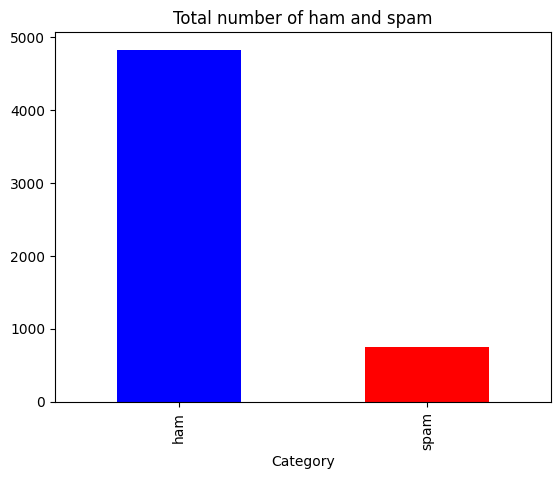

In [27]:
df['Category'].value_counts().plot.bar(color = ['b','r'])
plt.title('Total number of ham and spam')
plt.show()

In [32]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def clean_str(string):
    # Clean a string with RegexpTokenizer
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

# replace category string with numeric
df['Category'] = df['Category'].map({'ham' : 0,'spam' : 1 })
# clean the message
df['text_clean'] = df['Message'].apply(
  lambda string: clean_str(string))

# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.Category

# Split training and test dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)


In [33]:

from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix)
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model = DecisionTreeClassifier()
# train the model
model.fit(x_train, y_train)
# predict using test data
pred = model.predict(x_test)

# Accuracy Metrics
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.89      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

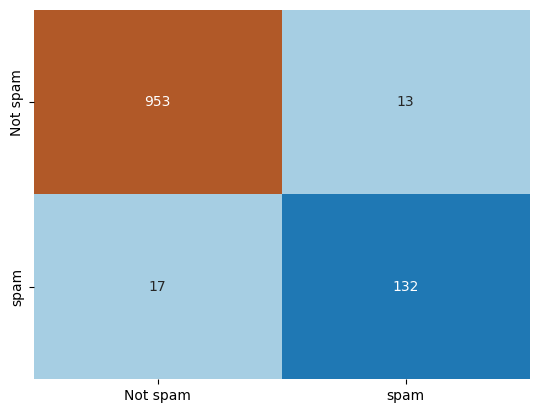

In [36]:
import seaborn as sns
cmat = confusion_matrix(y_test,pred)

sns.heatmap(cmat,annot= True,cmap = 'Paired',cbar = False,fmt = "d",xticklabels = ['Not spam','spam'],yticklabels=['Not spam','spam'])